# Proyek Individu Dasar Analitik Data


## Irfan Yusuf Khaerullah - 2206813290


# 1. Pemilihan Dataset & Validasi

Dataset yang digunakan  dapat diakses dari link berikut : https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores

# 2. Preprocessing & Pembersihan Data



In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Melakukan Read Data

In [69]:
df = pd.read_csv("Netflix.csv")
df_new = df.copy()
print(df.head())

   index        id                            title   type  \
0      0   tm84618                      Taxi Driver  MOVIE   
1      1  tm127384  Monty Python and the Holy Grail  MOVIE   
2      2   tm70993                    Life of Brian  MOVIE   
3      3  tm190788                     The Exorcist  MOVIE   
4      4   ts22164     Monty Python's Flying Circus   SHOW   

                                         description  release_year  \
0  A mentally unstable Vietnam War veteran works ...          1976   
1  King Arthur, accompanied by his squire, recrui...          1975   
2  Brian Cohen is an average young Jewish man, bu...          1979   
3  12-year-old Regan MacNeil begins to adapt an e...          1973   
4  A British sketch comedy series with the shows ...          1969   

  age_certification  runtime    imdb_id  imdb_score  imdb_votes  
0                 R      113  tt0075314         8.3    795222.0  
1                PG       91  tt0071853         8.2    530877.0  
2       

Melakukan Pengecekan untuk data yang NULL

In [70]:
numerical_columns = ['release_year', 'runtime', 'imdb_score', 'imdb_votes']
categorical_columns = ['type', 'age_certification', 'description']
print(df.isnull().sum())

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64


Selanjutnya melakukan Cleaning data dengan menghapus nilai null, dikarenakan data ini terdapat idmb score dan idmb votes yang tidak bisa dilakukan dengan median atau pendekatan lain karena tidak masuk akal jika memasukan score dan votes yang merupakan absolute count kepada film atau tv show yang berbeda bedasarkan pendekatan tersebut

In [71]:
## for col in numerical_columns:
 ##   if df[col].isnull().sum() > 0:
  #      df[col].fillna(df[col].median(), inplace=True)

# for col in categorical_columns:
  #  if df[col].isnull().sum() > 0:
    #    df[col].fillna(df[col].mode()[0], inplace=True)

df.dropna(subset=numerical_columns + categorical_columns, inplace=True)

print(df.isnull().sum())

index                0
id                   0
title                0
type                 0
description          0
release_year         0
age_certification    0
runtime              0
imdb_id              0
imdb_score           0
imdb_votes           0
dtype: int64


Langkah Selanjutnya adalah menghapus outlier dengan IQR

In [72]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
print(df.shape)

(2328, 11)


Melakukan Pengecekan Terlebih dahulu untuk kolom fitur di kategorikal untuk  menentukan metode konversi yang cocok untuk masing masing kolom

In [73]:
unique_age = df['age_certification'].nunique()
print("Umur berapa : ", unique_age)
print(df['age_certification'].value_counts())

unique_type = df['type'].nunique()
print("Tipe Berapa : ", unique_type)
print(df['type'].value_counts())

Umur berapa :  11
age_certification
TV-MA    709
TV-14    370
R        313
PG-13    279
PG       172
TV-PG    150
TV-Y7     93
G         85
TV-Y      84
TV-G      62
NC-17     11
Name: count, dtype: int64
Tipe Berapa :  2
type
SHOW     1468
MOVIE     860
Name: count, dtype: int64


Untuk Kolom age_certification ada 11 jenis kategori yang berbeda, sedangkan pada kolom tipe hanya terdapat 2, oleh karena itu pada kolom age_certification akan menggunakan ordinal, sedangkan kolom type akan menggunakan one hot encoding. Pada data ini tidak dilakukan normalisasi/standarisasi dikarenakan data seperti idmb score dan idmb votes tidak cocok untuk dilakukan normalisasi

 - imdb score : nilainya memang sudah dari range 0-10 bedasarkan situs resmi idmb

 - idmb votes : jumlah voting merupakan absolute count

In [74]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

certification_order = ['G', 'PG', 'PG-13', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', 'R', 'NC-17', 'UR', 'NR']
certification_mapping = {label: idx for idx, label in enumerate(certification_order)}
df.loc[~df['age_certification'].isin(certification_order), 'age_certification'] = 'NR'

df['age_certification'] = df['age_certification'].map(certification_mapping)

print(df.nlargest(5, 'imdb_score'))


      index        id       title  \
622     622  ts160526    Khawatir   
2787   2787  ts265844    #ABtalks   
3144   3144   ts85398  Our Planet   
1346   1346   ts37660  Reply 1988   
1953   1953   ts78298   My Mister   

                                            description  release_year  \
622   A TV show devoted to help young people to be m...          2005   
2787  #ABtalks is a YouTube interview show hosted by...          2018   
3144  Experience our planet's natural beauty and exa...          2019   
1346  A nostalgic trip back to the late 1980s throug...          2015   
1953  In a world that is less than kind, a young wom...          2018   

      age_certification  runtime     imdb_id  imdb_score  imdb_votes  \
622                   5       20   tt3062514         9.6      3046.0   
2787                  4       68  tt12635254         9.6         7.0   
3144                  3       50   tt9253866         9.3     41386.0   
1346                  5       95   tt5182866      

In [75]:
top5 = df.nlargest(5, 'imdb_score')

mean_top5 = top5['imdb_score'].mean()
variance_top5 = top5['imdb_score'].var()
std_top5 = top5['imdb_score'].std()

print(f"Top Five Highest imdb score mean :  {mean_top5:.2f}")
print(f"Top Five Highest imdb score variance :  {variance_top5:.3f}")
print(f"Top Five Highest imdb score standard deviation : {std_top5:.3f}")


Top Five Highest imdb score mean :  9.38
Top Five Highest imdb score variance :  0.042
Top Five Highest imdb score standard deviation : 0.205


Histogram

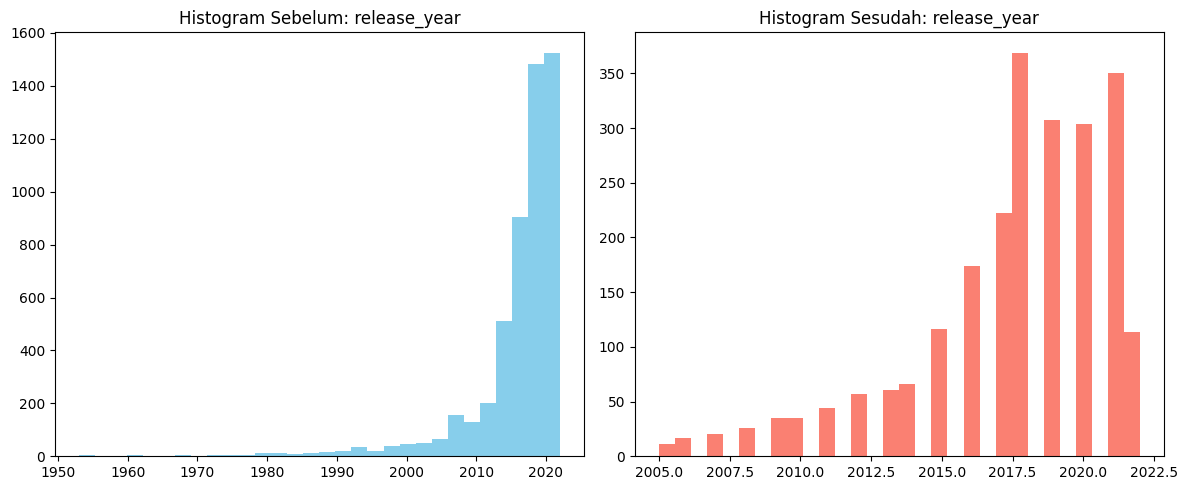

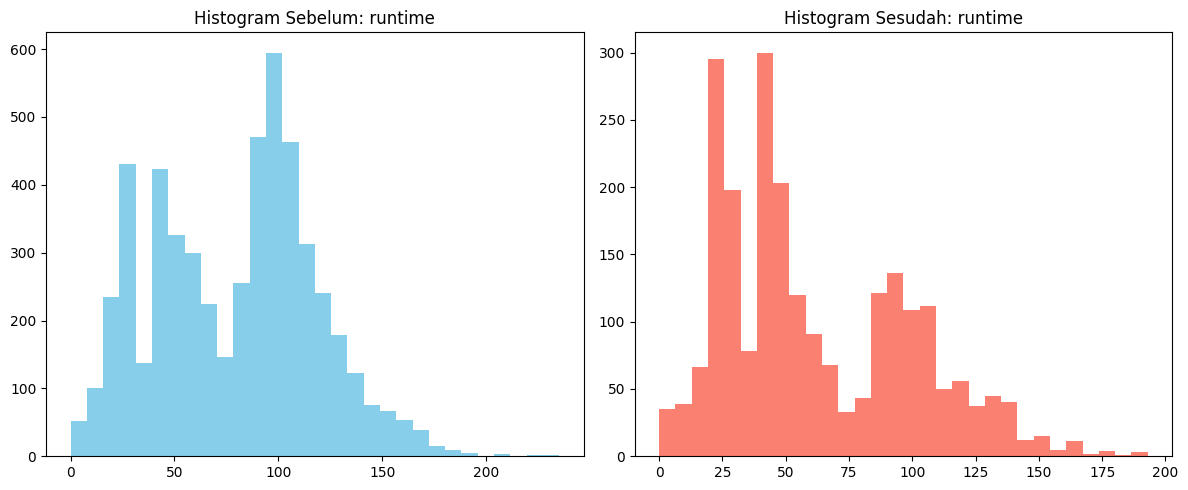

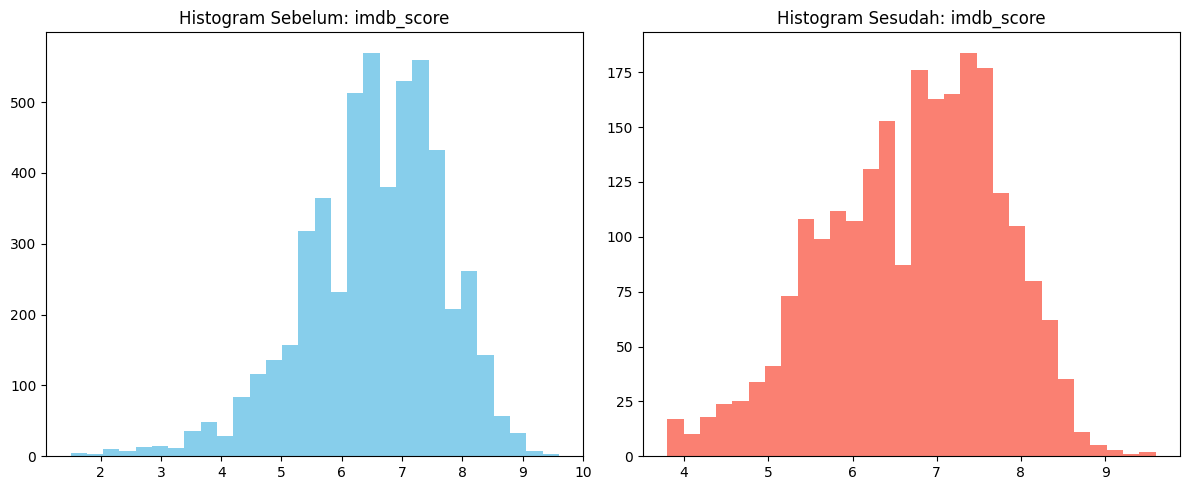

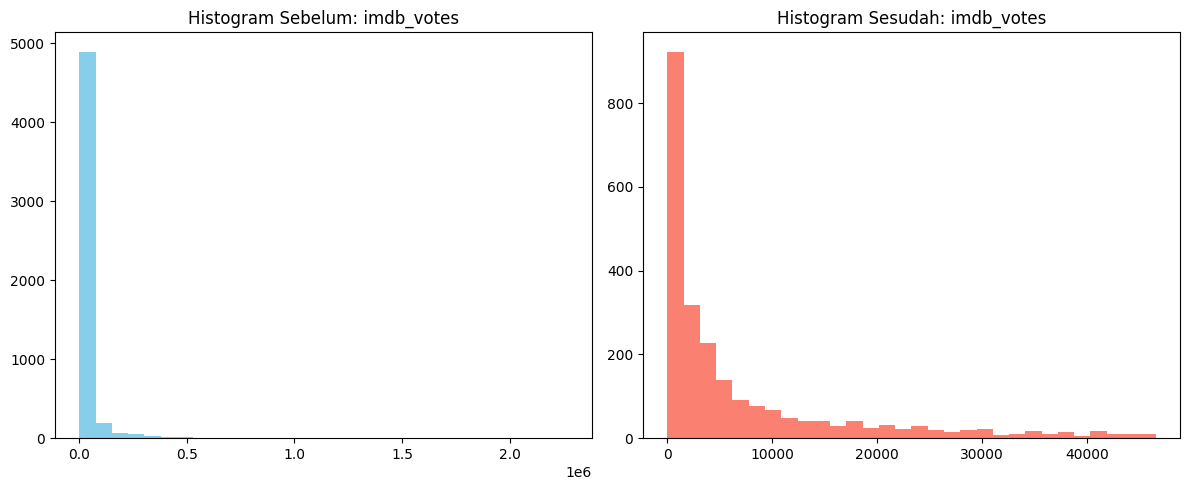

In [76]:
for col in numerical_columns:
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df_new[col].dropna(), bins=30, color='skyblue')
    plt.title(f'Histogram Sebelum: {col}')
    plt.subplot(1, 2, 2)
    plt.hist(df[col], bins=30, color='salmon')
    plt.title(f'Histogram Sesudah: {col}')
    plt.tight_layout()
    plt.show()

Scatter Plot

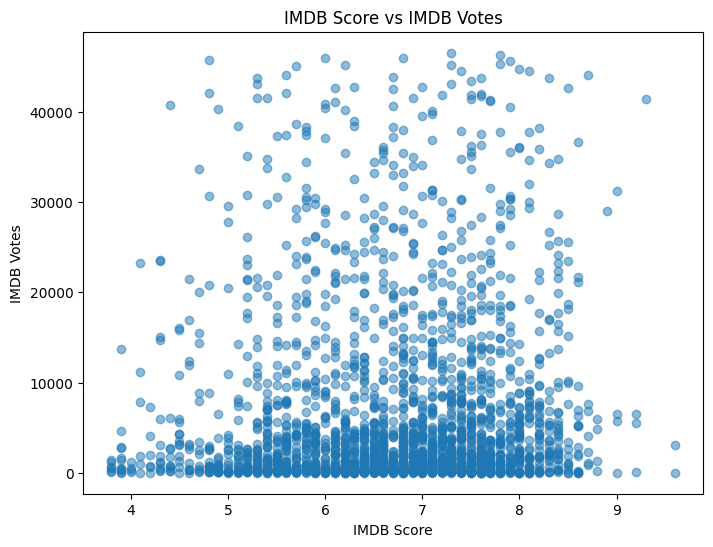

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(df['imdb_score'], df['imdb_votes'], alpha=0.5)
plt.xlabel('IMDB Score')
plt.ylabel('IMDB Votes')
plt.title('IMDB Score vs IMDB Votes')
plt.show()


# 3. Statistik Deskriptif

Perhitungan mean, median, varians, standar deviasi, dan korelasi antar variabel numerik, dapat menggunakan rumus rumus berikut

**Mean**

$$
\text{Mean} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

dimana

- n = jumlah data
- Σx = total seluruh data

**Median**

$$
\text{Median} =
\begin{cases}
x_{\frac{n+1}{2}} & \text{ $n$ ganjil} \\
\frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2} & \text{ $n$ genap}
\end{cases}
$$

- n = jumlah data

**Variance**

$$
\text{Variance} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$


- n = jumlah data
- Xi = Nilai data ke i
- x̄ = rata rata nilai data

**Standar Deviation**

$$
\text{Standard Deviation} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

$$
\text{Standard Deviation} = \sqrt{\text{Variance}}
$$


- n = jumlah data
- Xi = Nilai data ke i
- x̄ = rata rata nilai data



In [78]:
for col in numerical_columns:
    mean = df[col].mean()
    median = df[col].median()
    variance = df[col].var()
    std_dev = df[col].std()

    print(f"\n{col}:")
    print(f"Mean            : {mean:.2f}")
    print(f"Median          : {median:.2f}")
    print(f"Variance        : {variance:.2f}")
    print(f"Standard Deviasi: {std_dev:.2f}")


release_year:
Mean            : 2017.51
Median          : 2018.00
Variance        : 12.50
Standard Deviasi: 3.54

runtime:
Mean            : 62.24
Median          : 50.00
Variance        : 1401.46
Standard Deviasi: 37.44

imdb_score:
Mean            : 6.71
Median          : 6.80
Variance        : 1.07
Standard Deviasi: 1.03

imdb_votes:
Mean            : 7037.54
Median          : 2612.00
Variance        : 100291171.96
Standard Deviasi: 10014.55


In [79]:
print ("\nCorrelation")
print(df[numerical_columns].corr())


Correlation
              release_year   runtime  imdb_score  imdb_votes
release_year      1.000000 -0.171639   -0.073333   -0.081808
runtime          -0.171639  1.000000   -0.199434    0.285500
imdb_score       -0.073333 -0.199434    1.000000    0.063696
imdb_votes       -0.081808  0.285500    0.063696    1.000000


In [80]:
for col in numerical_columns:
    data = df[col].values
    n = len(data)

    # Mean
    mean = sum(data) / n

    # Mediam
    data_sorted = sorted(data)
    if n % 2 == 1:
        median = data_sorted[n // 2]
    else:
        mid1 = data_sorted[n // 2 - 1]
        mid2 = data_sorted[n // 2]
        median = (mid1 + mid2) / 2

    # Variance
    variance = sum((x - mean) ** 2 for x in data) / (n - 1)

    # Standar Deviasi
    std_dev = variance ** 0.5

    print(f"\n{col}")
    print(f"Mean               : {mean:.2f}")
    print(f"Median             : {median:.2f}")
    print(f"Variance           : {variance:.2f}")
    print(f"Standard Deviation : {std_dev:.2f}")



release_year
Mean               : 2017.51
Median             : 2018.00
Variance           : 12.50
Standard Deviation : 3.54

runtime
Mean               : 62.24
Median             : 50.00
Variance           : 1401.46
Standard Deviation : 37.44

imdb_score
Mean               : 6.71
Median             : 6.80
Variance           : 1.07
Standard Deviation : 1.03

imdb_votes
Mean               : 7037.54
Median             : 2612.00
Variance           : 100291171.96
Standard Deviation : 10014.55


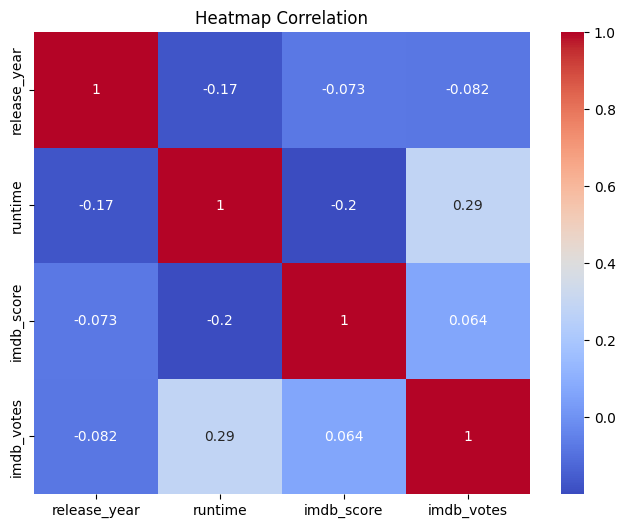

In [81]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.show()

# 4. Statistik Inferensial

## Uji Hipotesis

In [82]:
print(df['type_SHOW'].value_counts())

type_SHOW
True     1468
False     860
Name: count, dtype: int64


Perhitungan untuk T Test dan Confidence Interval

**T-Test**

$$
T = \frac{\bar{x}_1 - \bar{x}_2} {\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

- x̄1 = Rata Rata sampel 1
- x̄2 = Rata Rata sampel 2
- s1 = Standar Deviasi sampel 1
- s2 = Standar Deviasi sampel 2
- n1 = jumlah sampel 1
- n2 = jumlah sampel 2

**Confidence Interval**

$$
\text{CI} = \bar{x} \pm {z} \times \frac{s}{\sqrt{n}}
$$

- x̄ = Rata Rata Sampel
- z = Confidence Level
- s = Standar Deviasi Sampel
- n = jumlah sampel


In [83]:
# T TEST
from scipy.stats import ttest_ind

tvshow_score = df[df['type_SHOW'] == 1]['imdb_score']
movie_score = df[df['type_SHOW'] == 0]['imdb_score']
t_stat, p_value = ttest_ind(tvshow_score, movie_score)

print(f"\nHasil Uji t:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value    : {p_value:.100f}")


alpha = 0.05
if p_value < alpha:
    print("Terdapat perbedaan signifikan antara score TV show dan score movie")
else:
    print("Tidak terdapat perbedaan signifikan antara  score TV show dan score movie")


Hasil Uji t:
t-statistic: 17.7824
p-value    : 0.0000000000000000000000000000000000000000000000000000000000000000019809634288107052046670276822986287
Terdapat perbedaan signifikan antara score TV show dan score movie


p value < alpha maka dari itu kita akan menolak hipotesis, ini berarti terdapat perbedaan yang signifikan antara skor IMDB untuk TV Show dan film.

In [84]:
# Confidence interval
import scipy.stats as stats

mean_score = df['imdb_score'].mean()
std_score = df['imdb_score'].std()

n = len(df)
z_critical = stats.norm.ppf(0.975)

margin_error = z_critical * (std_score / np.sqrt(n))
lower_bound = mean_score - margin_error
upper_bound = mean_score + margin_error


print(f"\nInterval Kepercayaan 95% untuk Rata-rata IMDB Score: ")
print(f"{lower_bound:.2f} hingga {upper_bound:.2f}")




Interval Kepercayaan 95% untuk Rata-rata IMDB Score: 
6.66 hingga 6.75


Dengan Confidence Interval 95%, dapat dikatakan bahwa rata rata IMDB Score untuk TV Show dan Film berada di range 6.66 - 6.75 yanng menunjukkan bahwa rata rata film dan tv show di netflix memiliki rating yang cukup baik dengan skor mendekati 7

# 5. Eksplorasi Data (EDA) & Visualisasi

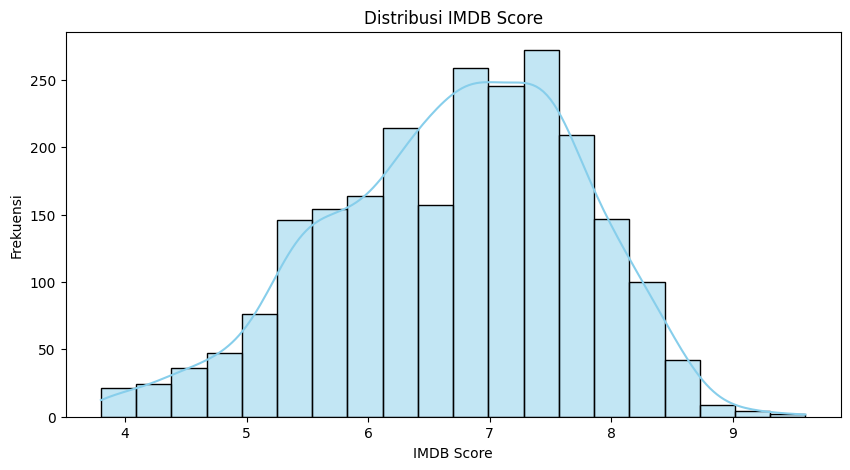

In [85]:
plt.figure(figsize=(10,5))
sns.histplot(df['imdb_score'], kde=True, color='skyblue', bins=20)
plt.title('Distribusi IMDB Score')
plt.xlabel('IMDB Score')
plt.ylabel('Frekuensi')
plt.show()


IMDB score memiliki distribusi yang menyebar, dengan range score diantara score 6-8 yang mencapai puncaknya. Ini menunjukkan bahwa rata rata score dari TV Show dan film netflix yang berasal dari IMDB memiliki rating diatas menengah

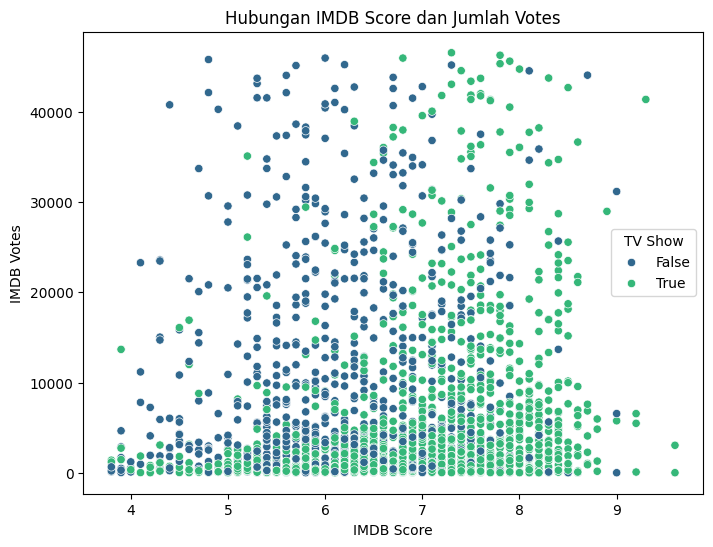

In [86]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='imdb_score', y='imdb_votes', hue='type_SHOW', data=df, palette='viridis')
plt.title('Hubungan IMDB Score dan Jumlah Votes')
plt.xlabel('IMDB Score')
plt.ylabel('IMDB Votes')
plt.legend(title='TV Show')
plt.show()


Pada grafik menunjukkan persebaran antara titik film dan titik tv show tersebar luas di seluruh rentang score, TV Show cenederung mendapatkan lebih vote dibandingkan film, meskipun begitu jumlah vote tidak menentukan imdb score, karena terdapat tv show ataupun film dengan jumlah vote yang banyak tetapi score kecil dan begitu juga sebaliknya.

Selain itu juga terdapat perbedaan skor signifikan antara film dan tv show seperti hasil T_Test yang sudah dilakukan

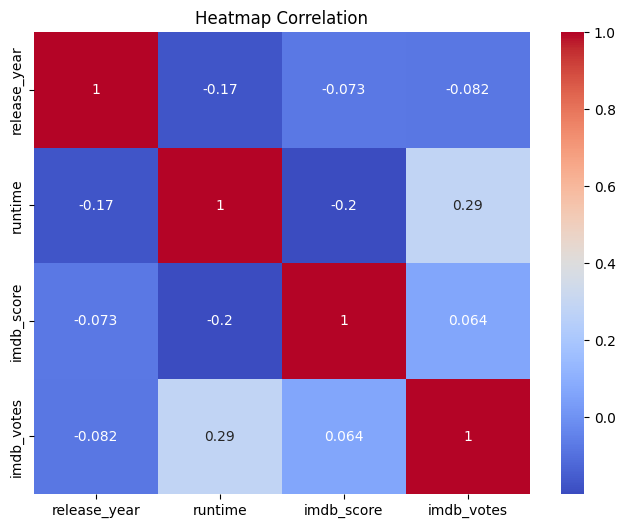

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Correlation')
plt.show()

Sebagian Besar hubungan variabel memiliki korelasi yang tidak terlalu kuat, dengan korelasi tertinggi adalah runtime dan imdb vote yang terbilang masih lemah yaitu 0.29. Ini menunjukkan bahwa sebagai variabel tidak memiliki korelasi yang terlalu signifikan antar fitur